#### First: Computing marginal liquidity cost

"Distilling Liquidity Costs from Limit Order Books" by Amaya, Rochen et al (2015) states that in order to compute the marginal liquidity cost $\hat{\lambda_t}$ in a time interval $\tau$, one must extract the coefficient from a linear regression of $X$ (sum of quantity for bid type) versus $S(X)$ (the average price per share) in that time interval. This is a similar appoach as to one that would be used to calculate the Beta in the CAPM (see [paper Robertson 2018, Estimating Beta](https://www.ofgem.gov.uk/ofgem-publications/145143)). For the CAPM a linear or bayesian regression is usually used to determine the coefficients.

We first must pre-process our data to put it into the right format for a linear regression with the following columns:
* Time $t$
* $X$ (sum of quantity for bid type) 
* $S(X)$ (the average price per share)

This is done using the get_processed_lob_time_series method.

#### Second: Now compute the intercept $\hat{\alpha}$ and the margin liquidity cost $\hat{\lambda_t}$
We can do this with a probablistic or deterministic rolling linear regression analysis. See [here](https://docs.pymc.io/notebooks/GLM-rolling-regression.html) for example of a Bayesian regression analysis with PYMC3. This approach was explored quickly but did not sample without crashing - see function train_bayesian_rolling_regressor(). A simple rolling regression was finally implemented using StatsModels


References:

* [Impact Cost calculation](https://economictimes.indiatimes.com/definition/impact-cost#:~:text=Definition%3A%20Impact%20cost%20is%20the,liquidity%20condition%20on%20the%20counter.&text=This%20is%20a%20cost%20that,to%20lack%20of%20market%20liquidity).
* [Limit Order Books](https://www.imperial.ac.uk/media/imperial-college/research-centres-and-groups/cfm-imperial-institute-of-quantitative-finance/events/imperial-eth-2016/Julius-Bonart.pdf)
* [Understanding Limit Order Book](https://www.tradientblog.com/2020/03/understanding-the-limit-order-book/)

In [4]:
import liquidity_costs as lc
import etl

Commencing `get_processed_lob_time_series()` method
Computing price per share
Computing data for `Ask` price regression analysis
Computing data for `Bid` price regression analysis
Succesfully executed! Exiting function

Computing liquidity costs from rolling regression analysis.
Window size = 96
Computing liquidity costs for ask transactions
Computing liquidity costs for bid transactions
R2 for asks transactions in Line Order Book (LOB) regression analysis: 0.7146
R2 for bids transactions in Line Order Book (LOB) regression analysis: 0.7088

Succesfully executed! Exiting function

Sucessfully saved image to: /home/philip/PhilipMLGithub/GAM_TEST/gam_test/data/static/lob_asks_liquidity_costs.csv
Sucessfully saved image to: /home/philip/PhilipMLGithub/GAM_TEST/gam_test/data/static/lob_bids_liquidity_costs.csv
Sucessfully saved CSV to: /home/philip/PhilipMLGithub/GAM_TEST/gam_test/data/static/lob_asks_liquidity_costs.csv
Sucessfully saved CSV to: /home/philip/PhilipMLGithub/GAM_TEST/gam_te

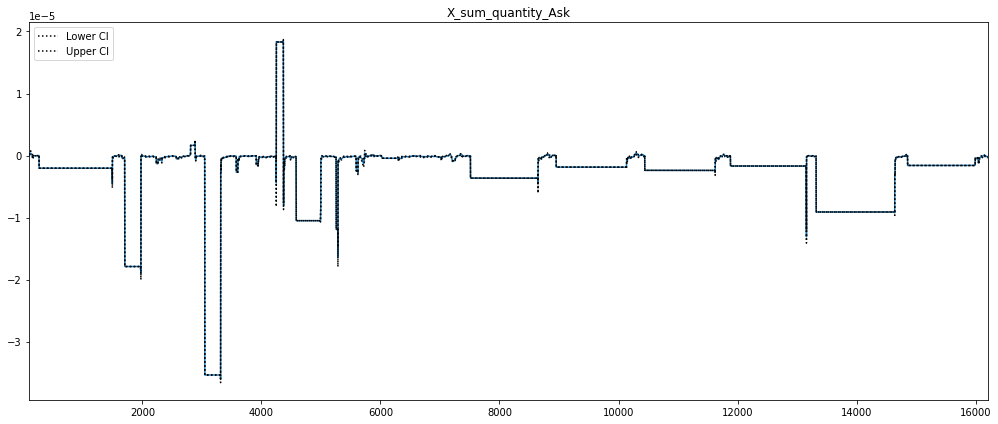

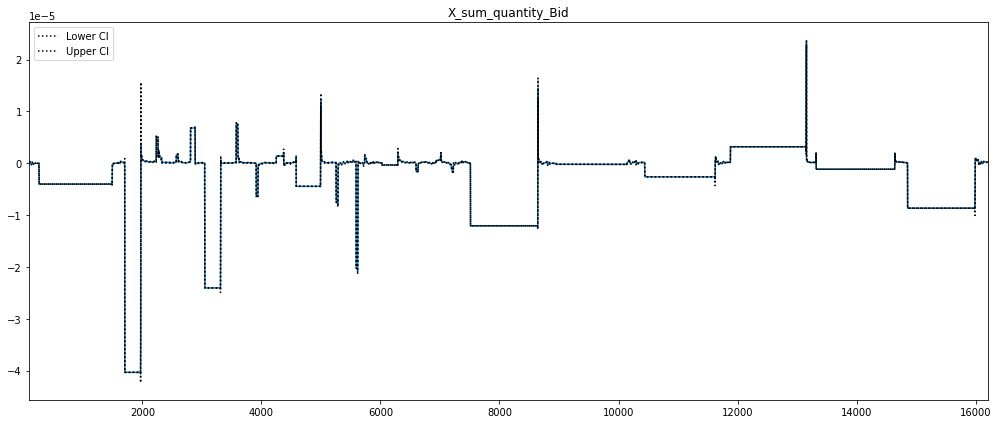

In [5]:
# Get data
ticker_df, lob_df = etl.get_data()

# Put in format required for regression analysis - function does linear interpolation and imputation of nulls/Nans
ask_regression_df, bid_regression_df = lc.get_processed_lob_time_series(lob_df)

# Save data 
results_dict = lc.compute_liquidity_cost(ask_regression_df, bid_regression_df)
lc.save_liquidity_data(results_dict)

Commencing `get_processed_lob_time_series()` method
Computing price per share
Computing data for `Ask` price regression analysis
Computing data for `Bid` price regression analysis
Succesfully executed! Exiting function

Computing liquidity costs from rolling regression analysis.
Window size = 96
Computing liquidity costs for ask transactions
Computing liquidity costs for bid transactions
R2 for asks transactions in Line Order Book (LOB) regression analysis: 0.7146
R2 for bids transactions in Line Order Book (LOB) regression analysis: 0.7088

Succesfully executed! Exiting function

Sucessfully saved image to: /home/philip/PhilipMLGithub/GAM_TEST/gam_test/data/static/lob_asks_liquidity_costs.csv
Sucessfully saved image to: /home/philip/PhilipMLGithub/GAM_TEST/gam_test/data/static/lob_bids_liquidity_costs.csv
Sucessfully saved CSV to: /home/philip/PhilipMLGithub/GAM_TEST/gam_test/data/static/lob_asks_liquidity_costs.csv
Sucessfully saved CSV to: /home/philip/PhilipMLGithub/GAM_TEST/gam_te

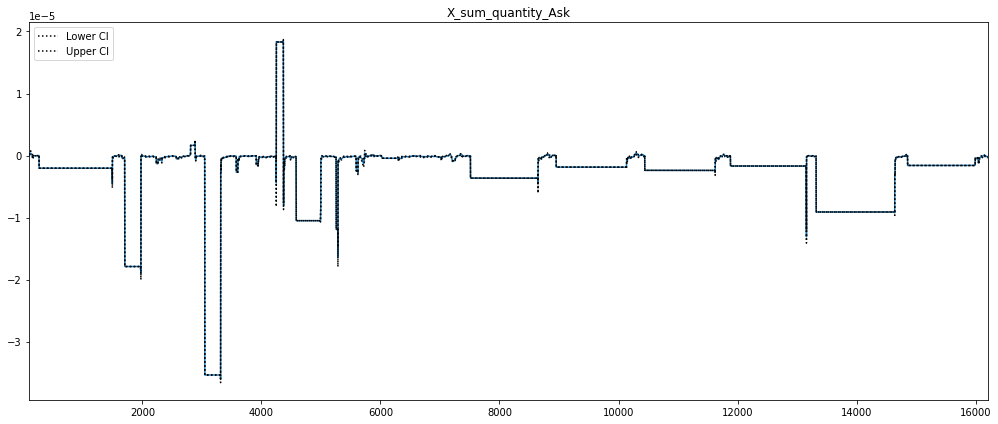

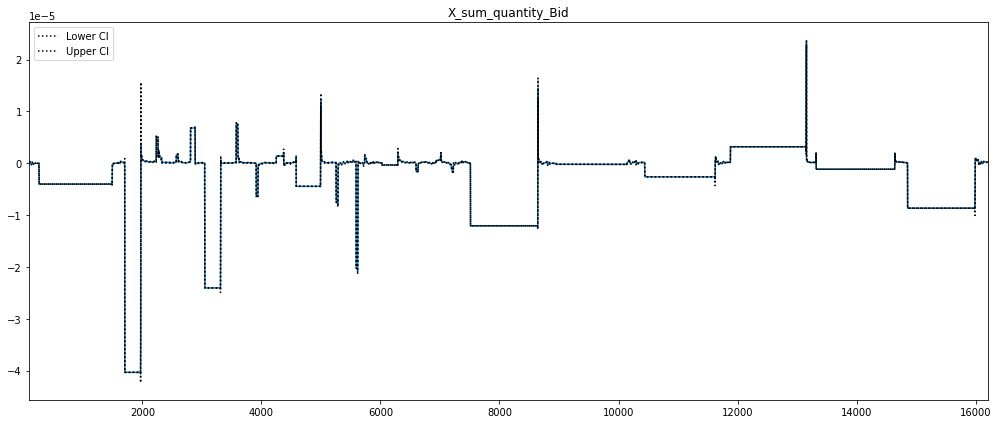

In [6]:
# Run code above in simple wrapper function
lc.run()

In [7]:
# Time weighted average over longer time horizon

In [8]:
def func(df):
    if df.size == 0: return
    timestep = 15*60
    indexes = df.index - (df.index[-1] - pd.Timedelta(seconds=timestep))
    seconds = indexes.seconds
    weight = [seconds[n]/timestep if n == 0 else (seconds[n] - seconds[n - 1])/timestep
          for n, k in enumerate(seconds)]
    return np.sum(weight*df.values)

In [34]:
results_dict["asks_rols_params"]["liquidity_cost"]

Time_Minute
2018-01-03 04:00:00             NaN
2018-01-03 04:30:00             NaN
2018-01-03 05:00:00             NaN
2018-01-03 05:30:00             NaN
2018-01-03 06:00:00             NaN
                           ...     
2018-12-06 15:00:00   -1.876041e-07
2018-12-06 15:30:00   -2.022092e-07
2018-12-06 16:00:00   -2.774749e-07
2018-12-06 16:30:00   -2.790083e-07
2018-12-06 17:00:00   -2.763041e-07
Name: liquidity_cost, Length: 16203, dtype: float64

In [32]:
import pandas as pd
import numpy as np
test = results_dict["asks_rols_params"]["liquidity_cost"].copy(deep=True)
test = pd.DataFrame(test)

In [ ]:
def normalize_time()

In [35]:
test = pd.DataFrame(results_dict["asks_rols_params"]["liquidity_cost"])

In [39]:
test.groupby(test.index.floor('d')).mean()


,liquidity_cost
Time_Minute,
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,2.339167e-07
2018-01-06,-5.479286e-08
2018-01-07,-2.903820e-08
...,...
2018-12-02,-8.665234e-07
2018-12-03,-6.323058e-07
2018-12-04,-2.409184e-07
